
## Dataset

Let's work with the cars.csv dataset, which describes cars and their price in Indian rupees :) The goal is to predict the price of a car based on its characteristics. Dataset description:

| String name            | Description                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | A unique identifier for each car ad.                                                                                         |
| Brand                  | Car brand or manufacturer (e.g. Toyota, Honda, Ford, etc.).                                                                                    |
| Model                  | Car model (e.g. Camry, Civic, Mustang, etc.).                                                                                               |
| Year                   | Year of manufacture of the vehicle.                                                                                                                           |
| Kilometers_Driven      | The total mileage of the vehicle in kilometres.                                                                                                                   |
| Fuel_Type              | The type of fuel the vehicle uses (e.g. petrol, diesel, electric, etc.).                                                                     |
| Transmission           | Type of vehicle transmission (e.g. manual, automatic).                                                                                           |
| Owner_Type             | Number of previous owners of the car (for example, first, second, third).                                                                           |
| Mileage                | Fuel efficiency of the vehicle in kilometres per litre.                                                                                                    |
| Engine                 | Vehicle engine capacity in cubic centimetres (CC).                                                                                                   |
| Power                  | Maximum vehicle power in horsepower (bhp).                                                                                               |
| Seats                  | The number of seats in the car.                                                                                                                          |
| Price                  | The price of the car in INR (Indian Rupees), which is the target variable for prediction.                                                                      |

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [45]:
df = pd.read_csv("C:/Users/dcmaterik_1/Documents/ML_for_people/Data/Lesson 4 Linear regression final project/cars.csv")

In [46]:
df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


In [49]:
df.loc[0]

Car_ID                     1
Brand                 Toyota
Model                Corolla
Year                    2018
Kilometers_Driven      50000
Fuel_Type             Petrol
Transmission          Manual
Owner_Type             First
Mileage                   15
Engine                  1498
Power                    108
Seats                      5
Price                 800000
Name: 0, dtype: object

In [50]:
df.select_dtypes('object')

,Brand,Model,Fuel_Type,Transmission,Owner_Type
0,Toyota,Corolla,Petrol,Manual,First
1,Honda,Civic,Petrol,Automatic,Second
2,Ford,Mustang,Petrol,Automatic,First
3,Maruti,Swift,Diesel,Manual,Third
4,Hyundai,Sonata,Diesel,Automatic,Second
...,...,...,...,...,...
95,Mercedes,C-Class,Diesel,Automatic,First
96,Toyota,Innova Crysta,Diesel,Manual,Second
97,Ford,EcoSport,Petrol,Manual,Third
98,Hyundai,Verna,Petrol,Automatic,Second


In [51]:
for col in df.select_dtypes('object').columns:
  print(f'\n\n{col}')
  print(f'Number of unique values: {df[col].nunique()}\n')
  display(df[col].value_counts())



Brand
Number of unique values: 11



Brand
Ford          11
Hyundai       11
Tata          11
Toyota        10
Volkswagen    10
Audi          10
BMW           10
Mercedes      10
Honda          6
Maruti         6
Mahindra       5
Name: count, dtype: int64



Model
Number of unique values: 58



Model
Mustang          3
Altroz           3
C-Class          3
Verna            3
Fortuner         2
S-Cross          2
Vitara           2
WR-V             2
Ameo             2
A3               2
7 Series         2
GLE              2
Yaris            2
Ranger           2
Santro           2
Tigor            2
T-Roc            2
BR-V             2
Elantra          2
Q7               2
X5               2
GLA              2
Camry            2
Venue            2
Tiago            2
XUV300           2
Vento            2
A5               2
3 Series         2
Innova Crysta    2
Safari           2
EcoSport         2
Aspire           2
E-Class          2
X3               2
A6               2
Passat           2
Thar             2
Creta            1
Swift            1
Sonata           1
Nexon            1
Scorpio          1
Polo             1
A4               1
X1               1
Endeavour        1
City             1
Harrier          1
Ertiga           1
Civic            1
Tiguan           1
Q3    



Fuel_Type
Number of unique values: 2



Fuel_Type
Petrol    52
Diesel    48
Name: count, dtype: int64



Transmission
Number of unique values: 2



Transmission
Automatic    57
Manual       43
Name: count, dtype: int64



Owner_Type
Number of unique values: 3



Owner_Type
First     44
Second    43
Third     13
Name: count, dtype: int64

In [52]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Price']), df['Price'], test_size=0.2, random_state=12)

In [53]:
fuel_type_codes = {'Diesel': 0, 'Petrol': 1}
X_train['Fuel_Type_Code'] = X_train.Fuel_Type.map(fuel_type_codes)
X_test['Fuel_Type_Code'] = X_test.Fuel_Type.map(fuel_type_codes)

transmission_codes = {'Manual': 0, 'Automatic': 1}
X_train['Transmission_Code'] = X_train.Transmission.map(transmission_codes)
X_test['Transmission_Code'] = X_test.Transmission.map(transmission_codes)

In [54]:
mean_model_price = df[df.index.isin(X_train.index)].groupby('Model').Price.mean().to_dict()

In [55]:
mean_model_price

{'3 Series': 2800000.0,
 '5 Series': 3000000.0,
 '7 Series': 3500000.0,
 'A3': 2000000.0,
 'A5': 2600000.0,
 'A6': 3200000.0,
 'Altroz': 600000.0,
 'Ameo': 500000.0,
 'Aspire': 600000.0,
 'BR-V': 850000.0,
 'C-Class': 2700000.0,
 'Camry': 1800000.0,
 'Civic': 1000000.0,
 'Corolla': 800000.0,
 'E-Class': 2700000.0,
 'EcoSport': 750000.0,
 'Elantra': 800000.0,
 'Endeavour': 2000000.0,
 'Fortuner': 2500000.0,
 'GLA': 2400000.0,
 'GLC': 2500000.0,
 'GLE': 4000000.0,
 'Harrier': 1600000.0,
 'Innova': 1400000.0,
 'Innova Crysta': 1400000.0,
 'Mustang': 2633333.3333333335,
 'Nexon': 750000.0,
 'Passat': 1600000.0,
 'Q7': 3000000.0,
 'Ranger': 1500000.0,
 'S-Cross': 700000.0,
 'Safari': 1300000.0,
 'Santro': 450000.0,
 'Scorpio': 900000.0,
 'Sonata': 850000.0,
 'Swift': 600000.0,
 'T-Roc': 1600000.0,
 'Thar': 1200000.0,
 'Tiago': 500000.0,
 'Tigor': 500000.0,
 'Vento': 650000.0,
 'Venue': 550000.0,
 'Verna': 850000.0,
 'Vitara': 700000.0,
 'WR-V': 750000.0,
 'X3': 2800000.0,
 'X5': 3200000.0,


In [56]:
X_train['Mean_Model_Price'] = X_train.Model.map(mean_model_price)
X_test['Mean_Model_Price'] = X_test.Model.map(mean_model_price)

In [57]:
df[df.index.isin(X_train.index)]['Price'].mean()

1680000.0

In [58]:
X_test[X_test.Mean_Model_Price.isna()]

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Mean_Model_Price
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1,NaN
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1,0,NaN
15,16,Honda,City,2017,42000,Diesel,Manual,Second,25,1498,98,5,0,0,NaN
21,22,Ford,Figo,2020,15000,Petrol,Manual,Third,18,1194,94,5,1,0,NaN
12,13,Hyundai,Creta,2019,22000,Petrol,Manual,Third,16,1497,113,5,1,0,NaN
8,9,Audi,A4,2017,30000,Diesel,Automatic,First,18,1968,187,5,0,1,NaN
9,10,BMW,X1,2019,20000,Diesel,Automatic,Second,20,1995,190,5,0,1,NaN
7,8,Volkswagen,Polo,2020,25000,Petrol,Automatic,First,18,999,76,5,1,1,NaN
16,17,Volkswagen,Tiguan,2018,32000,Diesel,Automatic,First,17,1968,141,5,0,1,NaN


In [25]:
X_test.columns

Index(['Car_ID', 'Brand', 'Model', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Fuel_Type_Code', 'Transmission_Code', 'Mean_Model_Price'],
      dtype='object')

In [59]:
X_test.Mean_Model_Price.fillna(1680000.0, inplace=True)

C:\Users\dcmaterik_1\AppData\Local\Temp\ipykernel_23716\90066494.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_test.Mean_Model_Price.fillna(1680000.0, inplace=True)


In [60]:
def categorize_model(model):
    sedans = ['Corolla', 'Civic', 'Sonata', 'A4', '3 Series', 'Verna', 'Elantra']
    suvs = ['Tiguan', 'Q3', 'X1', 'GLC', 'Fortuner', 'Harrier', 'Ertiga', 'Thar', 'Safari']
    hatchbacks = ['Swift', 'Polo', 'Figo', 'Altroz', 'WR-V', 'Santro', 'Tiago', 'Ameo']
    luxury = ['Mustang', '5 Series', 'E-Class', '7 Series', 'GLE']

    if model in sedans:
        return 'Sedan'
    elif model in suvs:
        return 'SUV'
    elif model in hatchbacks:
        return 'Hatchback'
    elif model in luxury:
        return 'Luxury'
    else:
        return 'Other'

X_train['Model_Group'] = X_train['Model'].apply(categorize_model)
X_test['Model_Group'] = X_test['Model'].apply(categorize_model)

In [61]:
from sklearn.preprocessing import OneHotEncoder

ohe_columns = ['Brand', 'Model_Group']
ohenc = OneHotEncoder(sparse_output=False)
ohenc.fit(X_train[ohe_columns])

encoded_cols = list(ohenc.get_feature_names_out(ohe_columns))
X_train[encoded_cols] = ohenc.transform(X_train[ohe_columns])
X_test[encoded_cols] = ohenc.transform(X_test[ohe_columns])

In [62]:
encoded_cols

['Brand_Audi',
 'Brand_BMW',
 'Brand_Ford',
 'Brand_Honda',
 'Brand_Hyundai',
 'Brand_Mahindra',
 'Brand_Maruti',
 'Brand_Mercedes',
 'Brand_Tata',
 'Brand_Toyota',
 'Brand_Volkswagen',
 'Model_Group_Hatchback',
 'Model_Group_Luxury',
 'Model_Group_Other',
 'Model_Group_SUV',
 'Model_Group_Sedan']

In [63]:
from sklearn.preprocessing import OrdinalEncoder

ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']]) 
ordenc.fit(X_train[['Owner_Type']])

X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])

In [64]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Mean_Model_Price,Model_Group,Brand_Audi,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Model_Group_Hatchback,Model_Group_Luxury,Model_Group_Other,Model_Group_SUV,Model_Group_Sedan,Owner_Type_Codes
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1,1600000.0,Other,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1,2600000.0,Other,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1,3200000.0,Other,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,650000.0,Other,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1,2500000.0,SUV,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Mean_Model_Price,Model_Group,Brand_Audi,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Model_Group_Hatchback,Model_Group_Luxury,Model_Group_Other,Model_Group_SUV,Model_Group_Sedan,Owner_Type_Codes
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1,1680000.0,SUV,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1,0,450000.0,Hatchback,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,650000.0,Other,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1,0,1680000.0,SUV,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1,0,600000.0,Other,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0


(None, None)

In [65]:
df_for_viz = pd.concat([X_train.select_dtypes('number'), y_train], axis=1)

In [66]:
df_for_viz

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Mean_Model_Price,Brand_Audi,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Model_Group_Hatchback,Model_Group_Luxury,Model_Group_Other,Model_Group_SUV,Model_Group_Sedan,Owner_Type_Codes,Price
83,84,2019,22000,18,1498,148,5,1,1,1.600000e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1600000
55,56,2018,28000,17,1968,187,5,0,1,2.600000e+06,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2600000
26,27,2018,28000,15,1984,241,5,1,1,3.200000e+06,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3200000
54,55,2017,32000,18,1598,103,5,1,0,6.500000e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,650000
19,20,2017,26000,12,1991,241,5,1,1,2.500000e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,4,2020,30000,23,1248,74,5,0,0,6.000000e+05,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,600000
2,3,2017,20000,10,4951,395,4,1,1,2.633333e+06,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2500000
6,7,2018,45000,15,2179,140,7,0,1,9.000000e+05,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,900000
27,28,2019,22000,18,1995,187,5,0,1,2.800000e+06,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2800000


<Axes: >

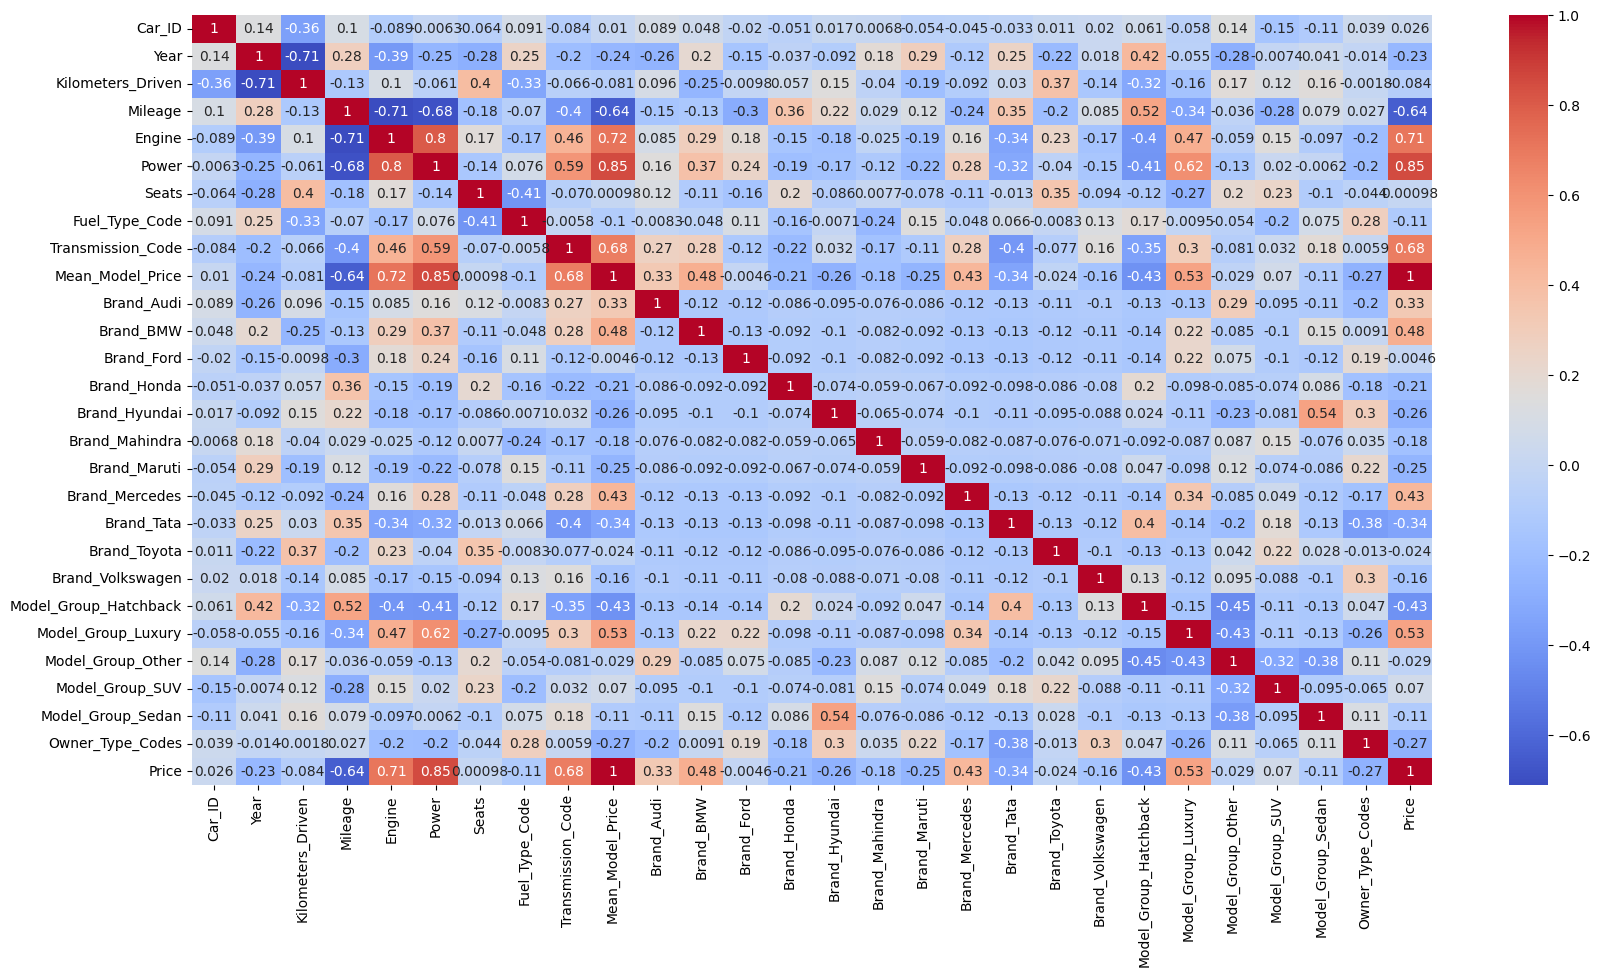

In [67]:
plt.figure(figsize=(20,10))
sns.heatmap(df_for_viz.corr(),annot=True,cmap="coolwarm")

In [68]:
df_for_viz.corr()['Price'].sort_values()

Mileage                 -0.638404
Model_Group_Hatchback   -0.425862
Brand_Tata              -0.341815
Owner_Type_Codes        -0.265537
Brand_Hyundai           -0.263022
Brand_Maruti            -0.249737
Year                    -0.233769
Brand_Honda             -0.209779
Brand_Mahindra          -0.178627
Brand_Volkswagen        -0.158742
Fuel_Type_Code          -0.110782
Model_Group_Sedan       -0.108410
Kilometers_Driven       -0.083951
Model_Group_Other       -0.029246
Brand_Toyota            -0.023778
Brand_Ford              -0.004592
Seats                    0.000979
Car_ID                   0.025560
Model_Group_SUV          0.069772
Brand_Audi               0.328858
Brand_Mercedes           0.431606
Brand_BMW                0.477522
Model_Group_Luxury       0.530088
Transmission_Code        0.680731
Engine                   0.710561
Power                    0.849137
Mean_Model_Price         0.998440
Price                    1.000000
Name: Price, dtype: float64

In [69]:
X_train.drop(columns=X_train.select_dtypes('object').columns, inplace=True)
X_test.drop(columns=X_test.select_dtypes('object').columns, inplace=True)

In [70]:
X_test.columns

Index(['Car_ID', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power',
       'Seats', 'Fuel_Type_Code', 'Transmission_Code', 'Mean_Model_Price',
       'Brand_Audi', 'Brand_BMW', 'Brand_Ford', 'Brand_Honda', 'Brand_Hyundai',
       'Brand_Mahindra', 'Brand_Maruti', 'Brand_Mercedes', 'Brand_Tata',
       'Brand_Toyota', 'Brand_Volkswagen', 'Model_Group_Hatchback',
       'Model_Group_Luxury', 'Model_Group_Other', 'Model_Group_SUV',
       'Model_Group_Sedan', 'Owner_Type_Codes'],
      dtype='object')

In [71]:
X_train.columns

Index(['Car_ID', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power',
       'Seats', 'Fuel_Type_Code', 'Transmission_Code', 'Mean_Model_Price',
       'Brand_Audi', 'Brand_BMW', 'Brand_Ford', 'Brand_Honda', 'Brand_Hyundai',
       'Brand_Mahindra', 'Brand_Maruti', 'Brand_Mercedes', 'Brand_Tata',
       'Brand_Toyota', 'Brand_Volkswagen', 'Model_Group_Hatchback',
       'Model_Group_Luxury', 'Model_Group_Other', 'Model_Group_SUV',
       'Model_Group_Sedan', 'Owner_Type_Codes'],
      dtype='object')

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


model = LinearRegression().fit(X_train, y_train)


y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


train_loss = mean_squared_error(y_train, y_train_pred, squared=False)
test_loss = mean_squared_error(y_test, y_test_pred, squared=False)

print(f'Model error on the training dataset: {round(train_loss, 2)}')
print(f'Model error on the test dataset: {round(test_loss, 2)}')

Model error on the training dataset: 47895.02
Model error on the test dataset: 526893.51


C:\Users\dcmaterik_1\anaconda3\envs\Ml_for_people\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\dcmaterik_1\anaconda3\envs\Ml_for_people\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


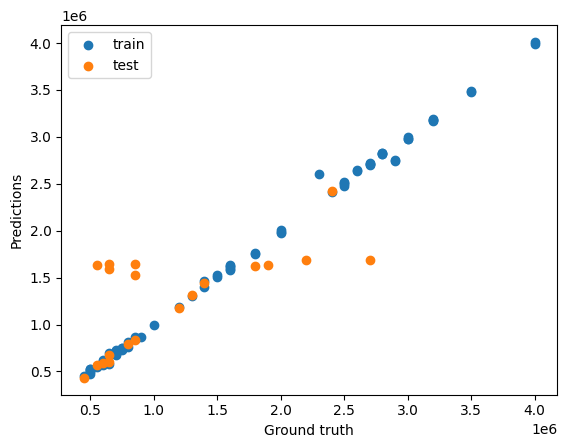

In [73]:
plt.scatter(y_train, y_train_pred, label='train')
plt.scatter(y_test, y_test_pred, label='test')
plt.xlabel('Ground truth')
plt.ylabel('Predictions')
plt.legend();

In [74]:
df.Price.describe().round(2)

count        100.00
mean     1574000.00
std      1000264.61
min       450000.00
25%       700000.00
50%      1300000.00
75%      2500000.00
max      4000000.00
Name: Price, dtype: float64

In [81]:
# no Mean_Model_Price

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


model = LinearRegression().fit(X_train.drop(columns=['Mean_Model_Price']), y_train)


y_train_pred = model.predict(X_train.drop(columns=['Mean_Model_Price']))
y_test_pred = model.predict(X_test.drop(columns=['Mean_Model_Price']))


train_loss = mean_squared_error(y_train, y_train_pred, squared=False)
test_loss = mean_squared_error(y_test, y_test_pred, squared=False)

print(f'Model error on the training dataset: {round(train_loss, 2)}')
print(f'Model error on the test dataset: {round(test_loss, 2)}')

Model error on the training dataset: 192816.88
Model error on the test dataset: 207802.94


C:\Users\dcmaterik_1\anaconda3\envs\Ml_for_people\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\dcmaterik_1\anaconda3\envs\Ml_for_people\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


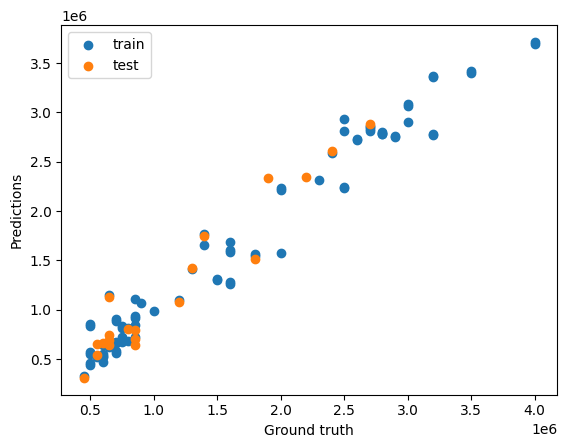

In [82]:
plt.scatter(y_train, y_train_pred, label='train')
plt.scatter(y_test, y_test_pred, label='test')
plt.xlabel('Ground truth')
plt.ylabel('Predictions')
plt.legend();

In [83]:


scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

In [84]:
X_train_scaled.describe().round(2)

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Mean_Model_Price,Brand_Audi,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Model_Group_Hatchback,Model_Group_Luxury,Model_Group_Other,Model_Group_SUV,Model_Group_Sedan,Owner_Type_Codes
count,80.00,80.00,80.00,80.00,80.00,80.00,80.00,80.00,80.00,80.00,80.00,80.00,80.00,80.00,80.00,80.00,80.00,80.00,80.00,80.00,80.00,80.00,80.00,80.00,80.00,80.00,80.00
mean,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00
std,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01
min,-1.85,-2.11,-2.00,-2.07,-1.32,-1.21,-1.65,-1.03,-1.26,-1.19,-0.33,-0.36,-0.36,-0.26,-0.28,-0.23,-0.26,-0.36,-0.38,-0.33,-0.31,-0.40,-0.38,-1.13,-0.28,-0.33,-0.99
25%,-0.79,-0.32,-0.69,-0.60,-0.64,-0.78,-0.30,-1.03,-1.26,-0.95,-0.33,-0.36,-0.36,-0.26,-0.28,-0.23,-0.26,-0.36,-0.38,-0.33,-0.31,-0.40,-0.38,-1.13,-0.28,-0.33,-0.99
50%,0.01,-0.32,-0.04,-0.02,0.06,-0.16,-0.30,0.98,0.80,-0.17,-0.33,-0.36,-0.36,-0.26,-0.28,-0.23,-0.26,-0.36,-0.38,-0.33,-0.31,-0.40,-0.38,0.88,-0.28,-0.33,0.54
75%,0.85,0.57,0.48,0.57,0.42,0.30,-0.30,0.98,0.80,0.94,-0.33,-0.36,-0.36,-0.26,-0.28,-0.23,-0.26,-0.36,-0.38,-0.33,-0.31,-0.40,-0.38,0.88,-0.28,-0.33,0.54
max,1.66,2.35,3.45,2.33,4.63,2.81,2.39,0.98,0.80,2.25,3.00,2.81,2.81,3.87,3.51,4.36,3.87,2.81,2.65,3.00,3.23,2.50,2.65,0.88,3.51,3.00,2.06


In [85]:
type(X_train_scaled), type(y_train)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [86]:
model = LinearRegression().fit(X_train_scaled, y_train)

y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

train_loss = mean_squared_error(y_train, y_train_pred, squared=False)
test_loss = mean_squared_error(y_test, y_test_pred, squared=False)

print(f'Model error on the training dataset: {round(train_loss, 2)}')
print(f'Model error on the test dataset: {round(test_loss, 2)}')

Model error on the training dataset: 47895.02
Model error on the test dataset: 526893.51


C:\Users\dcmaterik_1\anaconda3\envs\Ml_for_people\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\dcmaterik_1\anaconda3\envs\Ml_for_people\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [87]:
weights_df = pd.DataFrame({
    'feature': np.append(X_train.columns, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight').round(2).style.background_gradient()

,feature,weight
4,Engine,-42826.110000
7,Fuel_Type_Code,-42615.450000
3,Mileage,-25181.690000
12,Brand_Ford,-10956.140000
15,Brand_Mahindra,-10794.060000
6,Seats,-8308.490000
2,Kilometers_Driven,-6754.010000
20,Brand_Volkswagen,-6009.650000
24,Model_Group_SUV,-5931.950000
11,Brand_BMW,-4812.710000


In [89]:
# without `Mean_Model_Price`

model = LinearRegression().fit(X_train_scaled.drop(columns=['Mean_Model_Price']), y_train)

y_train_pred = model.predict(X_train_scaled.drop(columns=['Mean_Model_Price']))
y_test_pred = model.predict(X_test_scaled.drop(columns=['Mean_Model_Price']))

train_loss = mean_squared_error(y_train, y_train_pred, squared=False)
test_loss = mean_squared_error(y_test, y_test_pred, squared=False)

print(f'Model error on the training dataset: {round(train_loss, 2)}')
print(f'Model error on the test dataset: {round(test_loss, 2)}')

weights_df = pd.DataFrame({
    'feature': np.append(X_train.drop(columns=['Mean_Model_Price']).columns, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight').round(2).style.background_gradient()

Model error on the training dataset: 192816.88
Model error on the test dataset: 207802.94


C:\Users\dcmaterik_1\anaconda3\envs\Ml_for_people\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\dcmaterik_1\anaconda3\envs\Ml_for_people\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,feature,weight
14,Brand_Mahindra,-152659.320000
7,Fuel_Type_Code,-143710.490000
15,Brand_Maruti,-127872.400000
11,Brand_Ford,-117821.220000
13,Brand_Hyundai,-116831.470000
19,Brand_Volkswagen,-93153.510000
3,Mileage,-92945.510000
17,Brand_Tata,-88320.560000
24,Model_Group_Sedan,-78547.060000
12,Brand_Honda,-51695.830000


In [90]:
import statsmodels.api as sm

X = sm.add_constant(X_train_scaled)
model = sm.OLS(y_train.values, X)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     1004.
Date:                Sun, 23 Jun 2024   Prob (F-statistic):           1.92e-63
Time:                        03:39:31   Log-Likelihood:                -975.66
No. Observations:                  80   AIC:                             2003.
Df Residuals:                      54   BIC:                             2065.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   1.68e+

In [ ]:
X = sm.add_constant(X_train_scaled.drop(columns=['Mean_Model_Price']))
model = sm.OLS(y_train.values, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     63.60
Date:                Thu, 30 May 2024   Prob (F-statistic):           7.53e-32
Time:                        13:59:59   Log-Likelihood:                -1087.1
No. Observations:                  80   AIC:                             2224.
Df Residuals:                      55   BIC:                             2284.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   1.68e+

If we use `Mean_Model_Price`, then only it and Engine are significant.

If we train without the `Mean_Model_Price' column, we can identify the following features as significant at the 0.05 level:

1. **Mileage** (P>|t| = 0.028)
2. **Power** (P>|t| = 0.000)
3. **Fuel_Type_Code** (P>|t| = 0.000)
4. **Transmission_Code** (P>|t| = 0.010)
5. **Brand_Audi** (P>|t| = 0.000)
6. **Brand_BMW** (P>|t| = 0.000)
7. **Brand_Ford** (P>|t| = 0.001)
8. **Brand_Hyundai** (P>|t| = 0.000)
9. **Brand_Mahindra** (P>|t| = 0.000)
10. **Brand_Maruti** (P>|t| = 0.000)
11. **Brand_Volkswagen** (P>|t| = 0.003)
12. **Model_Group_Luxury** (P>|t| = 0.043)
13. **Model_Group_Sedan** (P>|t| = 0.018)

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Mean_Model_Price,Brand_Audi,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Model_Group_Hatchback,Model_Group_Luxury,Model_Group_Other,Model_Group_SUV,Model_Group_Sedan,Owner_Type_Codes
0,1.090928,0.568813,-0.693871,0.274862,-0.628491,-0.231967,-0.303562,0.975305,0.795395,-0.077499,-0.333333,-0.356034,-0.356034,-0.258199,-0.284747,-0.229416,-0.258199,-0.356034,-0.377964,-0.333333,3.229330,-0.399275,-0.377964,0.881917,-0.284747,-0.333333,0.535303
1,0.100381,-0.323442,-0.039533,-0.018324,0.087196,0.247012,-0.303562,-1.025320,0.795395,0.891241,3.000000,-0.356034,-0.356034,-0.258199,-0.284747,-0.229416,-0.258199,-0.356034,-0.377964,-0.333333,-0.309662,-0.399275,-0.377964,0.881917,-0.284747,-0.333333,-0.994135
2,-0.925542,-0.323442,-0.039533,-0.604696,0.111560,0.910213,-0.303562,0.975305,0.795395,1.472484,3.000000,-0.356034,-0.356034,-0.258199,-0.284747,-0.229416,-0.258199,-0.356034,-0.377964,-0.333333,-0.309662,-0.399275,-0.377964,0.881917,-0.284747,-0.333333,-0.994135
3,0.065005,-1.215697,0.396692,0.274862,-0.476217,-0.784634,-0.303562,0.975305,-1.257237,-0.997802,-0.333333,-0.356034,-0.356034,-0.258199,-0.284747,-0.229416,-0.258199,-0.356034,-0.377964,-0.333333,3.229330,-0.399275,-0.377964,0.881917,-0.284747,-0.333333,0.535303
4,-1.173178,-1.215697,-0.257646,-1.484254,0.122219,0.910213,-0.303562,0.975305,0.795395,0.794367,-0.333333,-0.356034,-0.356034,-0.258199,-0.284747,-0.229416,-0.258199,2.808717,-0.377964,-0.333333,-0.309662,-0.399275,-0.377964,-1.133893,3.511885,-0.333333,0.535303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,-1.739205,1.461068,0.178580,1.740791,-1.009176,-1.140798,-0.303562,-1.025320,-1.257237,-1.046239,-0.333333,-0.356034,-0.356034,-0.258199,-0.284747,-0.229416,3.872983,-0.356034,-0.377964,-0.333333,-0.309662,2.504541,-0.377964,-1.133893,-0.284747,-0.333333,2.064742
76,-1.774582,-1.215697,-0.911983,-2.070625,4.629524,2.801564,-1.652729,0.975305,0.795395,0.923532,-0.333333,-0.356034,2.808717,-0.258199,-0.284747,-0.229416,-0.258199,-0.356034,-0.377964,-0.333333,-0.309662,-0.399275,2.645751,-1.133893,-0.284747,-0.333333,-0.994135
77,-1.633075,-0.323442,1.814424,-0.604696,0.408494,-0.330219,2.394771,-1.025320,0.795395,-0.755617,-0.333333,-0.356034,-0.356034,-0.258199,-0.284747,4.358899,-0.258199,-0.356034,-0.377964,-0.333333,-0.309662,-0.399275,-0.377964,0.881917,-0.284747,-0.333333,0.535303
78,-0.890165,0.568813,-0.693871,0.274862,0.128310,0.247012,-0.303562,-1.025320,0.795395,1.084989,-0.333333,2.808717,-0.356034,-0.258199,-0.284747,-0.229416,-0.258199,-0.356034,-0.377964,-0.333333,-0.309662,-0.399275,-0.377964,0.881917,-0.284747,-0.333333,0.535303


In [91]:


significant_features = [
    "Mileage",
    "Power",
    "Fuel_Type_Code",
    "Transmission_Code",
    "Brand_Audi",
    "Brand_BMW",
    "Brand_Ford",
    "Brand_Hyundai",
    "Brand_Mahindra",
    "Brand_Maruti",
    "Brand_Volkswagen",
    "Model_Group_Luxury",
    "Model_Group_Sedan"
]
X = sm.add_constant(X_train_scaled[significant_features])
model = sm.OLS(y_train.values, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     64.31
Date:                Sun, 23 Jun 2024   Prob (F-statistic):           2.90e-32
Time:                        03:40:19   Log-Likelihood:                -1116.8
No. Observations:                  80   AIC:                             2262.
Df Residuals:                      66   BIC:                             2295.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                1.68e+06   3.44

In [92]:
remove = ['Car_ID', 'Year', 'Kilometers_Driven',
          'Seats', 'Brand_Toyota', 'Engine', 'Owner_Type_Codes',
          'Model_Group_Other', 'Model_Group_Hatchback']
X = sm.add_constant(X_train_scaled.drop(columns = remove))
model = sm.OLS(y_train.values, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     1143.
Date:                Sun, 23 Jun 2024   Prob (F-statistic):           3.88e-70
Time:                        03:40:42   Log-Likelihood:                -988.47
No. Observations:                  80   AIC:                             2015.
Df Residuals:                      61   BIC:                             2060.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                1.68e+06   7197